Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Import the datasets and visualize it

In [2]:
Flix_data = pd.read_csv('n_movies.csv')
Flix_data.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


Check for missing values

In [3]:
Flix_data.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

Impute missing values

In [4]:
Flix_data.fillna({'votes':'unavailable'}, inplace = True)

In [5]:
Mode_genre = Flix_data['genre'].mode()[0]
Flix_data['genre'] = Flix_data['genre'].fillna(Mode_genre)

In [6]:
Median_rating = Flix_data['rating'].median()
Flix_data['rating'] = Flix_data['rating'].fillna(Median_rating)

In [7]:
Mode_cert = Flix_data['certificate'].mode()[0]
Flix_data['certificate'] = Flix_data['certificate'].fillna(Mode_cert)

In [8]:
Mode_duration = Flix_data['duration'].mode()[0]
Flix_data['duration'] = Flix_data['duration'].fillna(Mode_duration)

In [9]:
Flix_data['year'] = Flix_data['year'].ffill()

Check for missing values again

In [10]:
Flix_data.isnull().sum()

title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64

Check the amount of certificates given to movies on Netflix

In [11]:
Flix_data.certificate.value_counts()

certificate
TV-MA        5973
TV-14        1209
TV-PG         543
R             472
Not Rated     467
TV-Y7         349
PG-13         282
TV-Y          175
PG            159
TV-G          151
Unrated        63
G              43
TV-Y7-FV       31
Approved       26
Passed          6
NC-17           4
MA-17           1
12              1
M               1
E10+            1
Name: count, dtype: int64

Show the top certificates on Netflix

C:\Users\darookie\AppData\Local\Temp\ipykernel_2348\3830409340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'certificate' ,order = Flix_data['certificate'].value_counts().index[0:14], data = Flix_data, palette = 'viridis')


Text(0.5, 1.0, 'Certificate ')

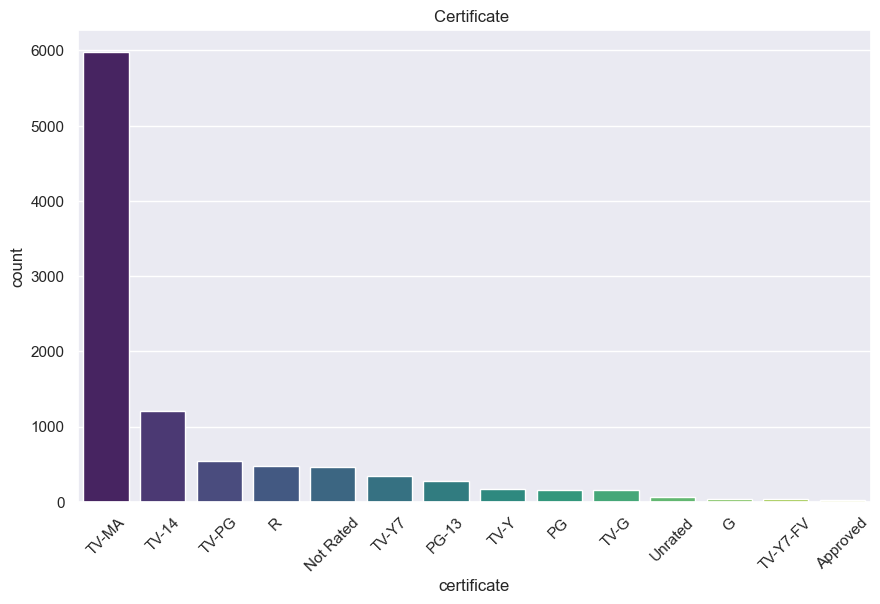

In [12]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'certificate' ,order = Flix_data['certificate'].value_counts().index[0:14], data = Flix_data, palette = 'viridis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Certificate ')

In [13]:
Flix_data.rating.value_counts()

rating
6.9    1430
7.2     348
7.4     329
7.1     319
7.6     305
       ... 
2.1       2
2.0       2
1.7       1
2.4       1
9.9       1
Name: count, Length: 79, dtype: int64

In [14]:
top_n = 15
Flix_data_top = Flix_data.nlargest(top_n,'rating')

C:\Users\darookie\AppData\Local\Temp\ipykernel_2348\151102352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Flix_data_top, x = 'title', y='rating',palette = 'viridis')


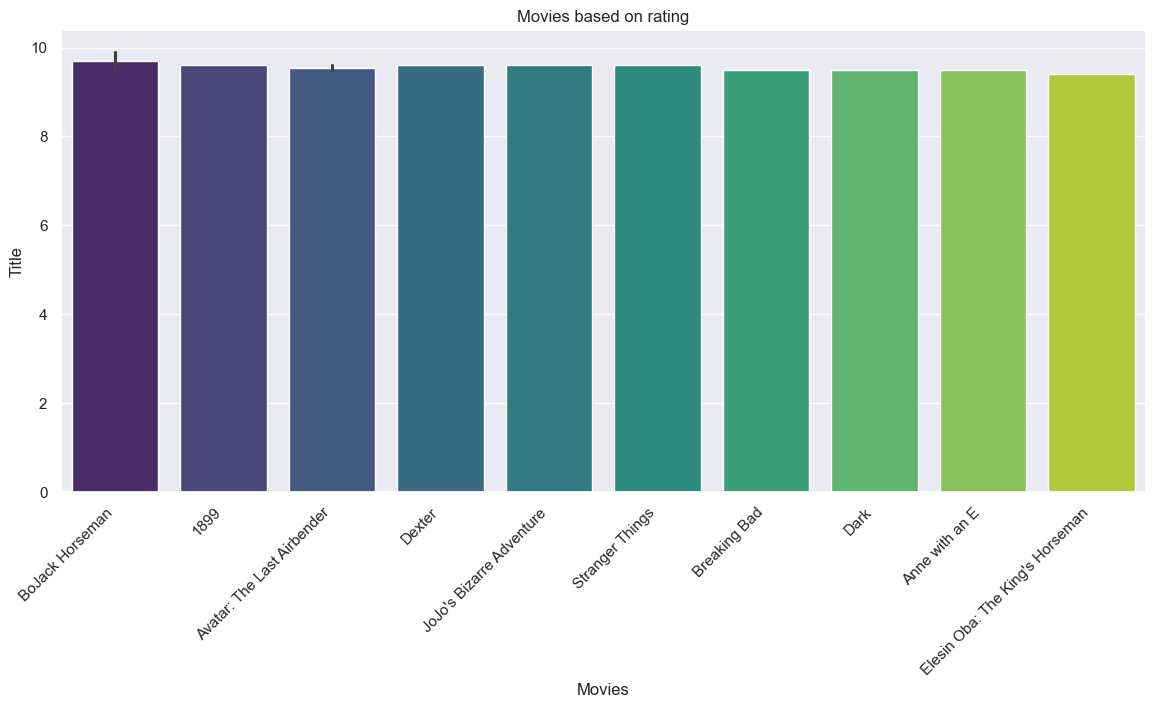

In [15]:

plt.figure(figsize = (14,6))
sns.barplot(data = Flix_data_top, x = 'title', y='rating',palette = 'viridis')
plt.xlabel('Movies')
plt.ylabel('Title')
plt.title('Movies based on rating')
plt.xticks(rotation =45 , ha = 'right')
plt.show()

Check the amount of ratings classification on Netflix

In [16]:
down_n = 12
Flix_data_down = Flix_data.nsmallest(down_n , 'rating')

C:\Users\darookie\AppData\Local\Temp\ipykernel_2348\3052614815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Flix_data_down , x = 'title' , y = 'rating' , palette = 'viridis')


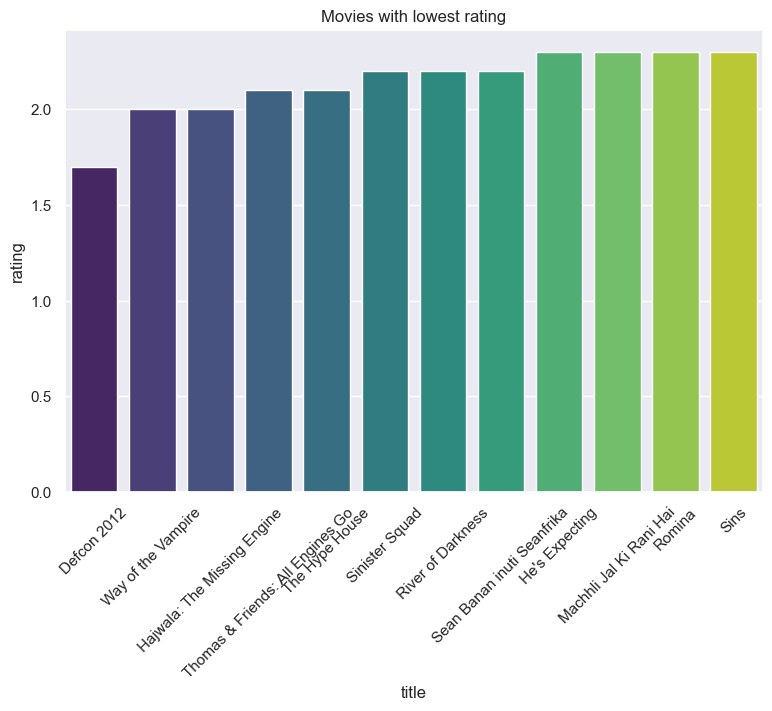

In [17]:
plt.figure(figsize = (9,6))
sns.barplot(data = Flix_data_down , x = 'title' , y = 'rating' , palette = 'viridis')
plt.xlabel('title')
plt.ylabel('rating')
plt.title('Movies with lowest rating')
plt.xticks(rotation = 45)
plt.show()

C:\Users\darookie\AppData\Local\Temp\ipykernel_2348\3789559623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'year' , order = Flix_data['year'].value_counts().index[0:9] , data = Flix_data, palette = 'viridis')


Text(0.5, 1.0, 'Year with the highest movie release')

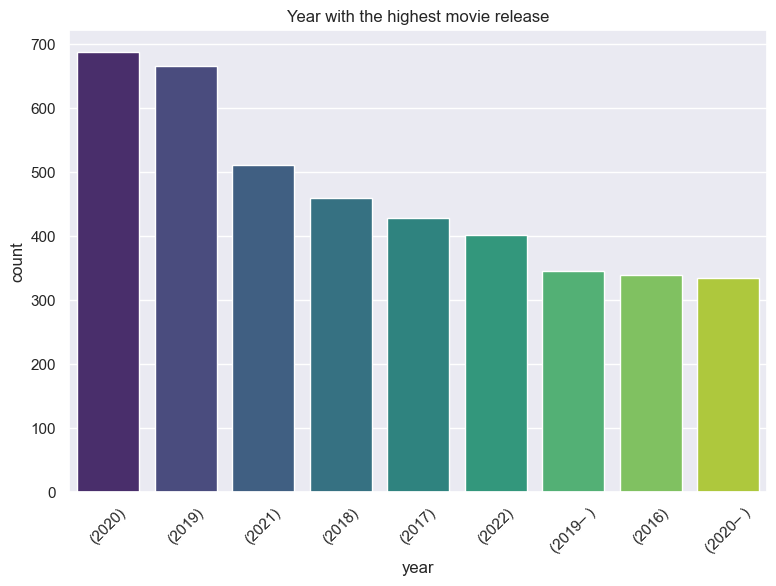

In [18]:
plt.figure (figsize = (9,6))
sns.countplot( x = 'year' , order = Flix_data['year'].value_counts().index[0:9] , data = Flix_data, palette = 'viridis')
plt.xticks(rotation= 45)
plt.title('Year with the highest movie release')

In [21]:
Most_rated_suggestion = Flix_data[Flix_data['rating'] > 8.5]
print(Most_rated_suggestion[['rating','title','genre','duration']])

      rating                   title                         genre duration
1        8.7               The Crown     Biography, Drama, History   58 min
2        8.9        Better Call Saul                  Crime, Drama   46 min
4        8.6  Cyberpunk: Edgerunners  Animation, Action, Adventure   24 min
6        9.2          Rick and Morty  Animation, Adventure, Comedy   23 min
7        9.5            Breaking Bad        Crime, Drama, Thriller   49 min
...      ...                     ...                           ...      ...
9932     8.9                 Friends               Comedy, Romance   22 min
9947     8.8            Black Mirror        Drama, Mystery, Sci-Fi   60 min
9948     8.7         Stranger Things        Drama, Fantasy, Horror   51 min
9951     9.5            Breaking Bad        Crime, Drama, Thriller   49 min
9954     8.7               The Crown     Biography, Drama, History   58 min

[385 rows x 4 columns]


Show the top 15 movies with the highest rating

Show the last 15 movies with the lowest rating

Show the top 10 years with the most movie release on Netflix

Suggest movies with rating above 8.5